In [20]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# Bitcoin Time Series Prediction
The goal of this project is to develop various models to predict the future price of bitcoin. The data set consists of the open and close prices of bitcoin from january 2012 to march 2019, gathered from Coinbase.

Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow. If you don't know what Bitcoin is , then get some knowledge about Bitcoin https://www.coindesk.com/information/what-is-bitcoin .

In [107]:
df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

In [108]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df['date'] = pd.to_datetime(df['Timestamp'],unit='s')

In [110]:
df.set_index('date', inplace=True)

In [111]:
df.drop('Timestamp',axis=1, inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2099760 entries, 2014-12-01 05:33:00 to 2019-01-07 22:06:00
Data columns (total 7 columns):
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7)
memory usage: 128.2 MB


In [113]:
df.index

DatetimeIndex(['2014-12-01 05:33:00', '2014-12-01 05:34:00',
               '2014-12-01 05:35:00', '2014-12-01 05:36:00',
               '2014-12-01 05:37:00', '2014-12-01 05:38:00',
               '2014-12-01 05:39:00', '2014-12-01 05:40:00',
               '2014-12-01 05:41:00', '2014-12-01 05:42:00',
               ...
               '2019-01-07 21:57:00', '2019-01-07 21:58:00',
               '2019-01-07 21:59:00', '2019-01-07 22:00:00',
               '2019-01-07 22:01:00', '2019-01-07 22:02:00',
               '2019-01-07 22:03:00', '2019-01-07 22:04:00',
               '2019-01-07 22:05:00', '2019-01-07 22:06:00'],
              dtype='datetime64[ns]', name='date', length=2099760, freq=None)

In [114]:
df = df.resample(rule='H').mean()

In [116]:
df.index

DatetimeIndex(['2014-12-01 05:00:00', '2014-12-01 06:00:00',
               '2014-12-01 07:00:00', '2014-12-01 08:00:00',
               '2014-12-01 09:00:00', '2014-12-01 10:00:00',
               '2014-12-01 11:00:00', '2014-12-01 12:00:00',
               '2014-12-01 13:00:00', '2014-12-01 14:00:00',
               ...
               '2019-01-07 13:00:00', '2019-01-07 14:00:00',
               '2019-01-07 15:00:00', '2019-01-07 16:00:00',
               '2019-01-07 17:00:00', '2019-01-07 18:00:00',
               '2019-01-07 19:00:00', '2019-01-07 20:00:00',
               '2019-01-07 21:00:00', '2019-01-07 22:00:00'],
              dtype='datetime64[ns]', name='date', length=35970, freq='H')

In [118]:
df.dropna(inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34683 entries, 2014-12-01 05:00:00 to 2019-01-07 22:00:00
Data columns (total 7 columns):
Open                 34683 non-null float64
High                 34683 non-null float64
Low                  34683 non-null float64
Close                34683 non-null float64
Volume_(BTC)         34683 non-null float64
Volume_(Currency)    34683 non-null float64
Weighted_Price       34683 non-null float64
dtypes: float64(7)
memory usage: 2.1 MB


In [ ]:
#Dropped the missing values since most of them were in the early stages of bitcoin trading, 
#whenre technical outtages were common or trading volume was virtually non existant

In [95]:
#Frequency is set for hourly periods, which will be the window of time for each data point in the analysis

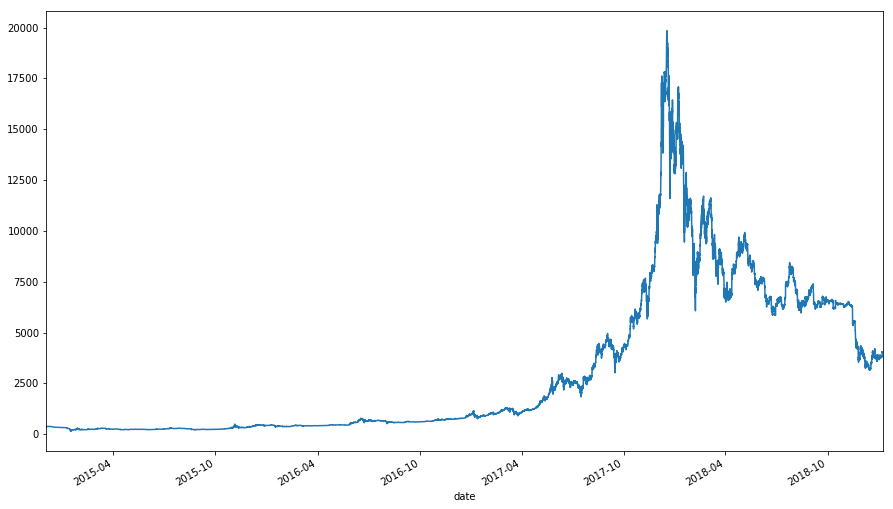

In [120]:
df['Close'].plot(figsize=(15,9)).autoscale(axis='x',tight=True)

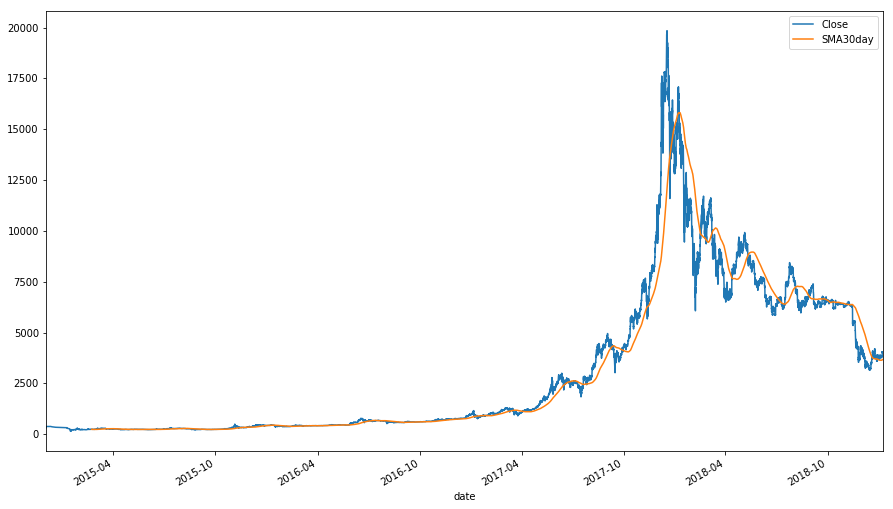

In [121]:
# Simple Moving Average
df['SMA30day'] = df['Close'].rolling(window=720).mean()
df[['Close','SMA30day']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

/home/diegofvargas/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


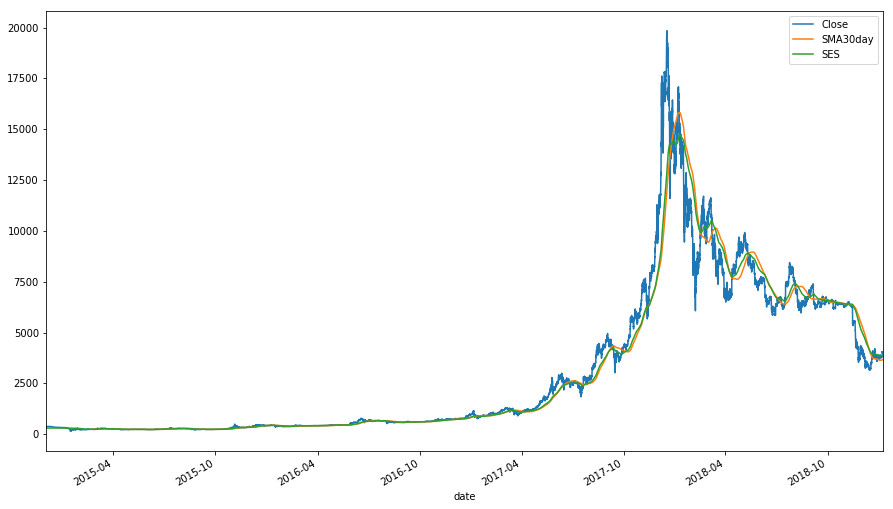

In [124]:
# Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df['SES'] = SimpleExpSmoothing(df['Close']).fit(smoothing_level=2/(720+1),optimized=False).fittedvalues.shift(-1)
df[['Close','SMA30day','SES']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

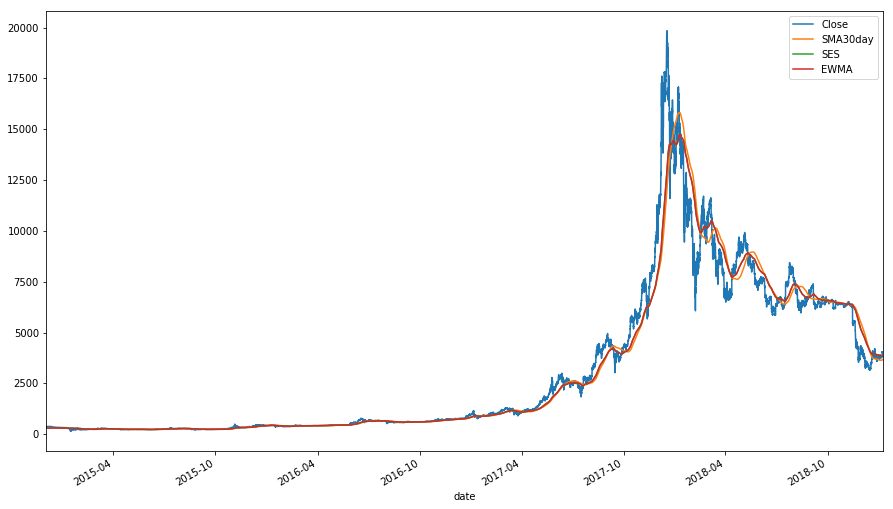

In [134]:
# Exponentially Weighted Moving Average
df['EWMA'] = df['Close'].ewm(span=720, adjust=False).mean()
df[['Close','SMA30day','SES','EWMA']].plot(figsize=(15,9), legend=True).autoscale(axis='x',tight=True)

In [135]:
# Simple exponential smoothing and Exponential weighted moving average resulted in the same fitting as they overlap 
# each other perfectly. Simple moving average was the worst fit since it seems to follow a more general trend, which
# makes sense since its the mean of the time series. 